In [1]:
# gerekli kütüphaneleri import edilir
import requests
from config import ACCESS_TOKEN_AUTH
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://api.themoviedb.org/3/discover/movie?include_adult=false&include_video=false&language=en-US&page=1&sort_by=popularity.desc"

# HTTP isteği için kullanılacak başlık (headers) bilgileri
headers = {
    "accept": "application/json",
    "Authorization": f"Bearer {ACCESS_TOKEN_AUTH}"
}
# URL üzerinden GET isteği gönderilir ve sonuç JSON formatında alınır
response = requests.get(url, headers=headers).json()

In [11]:
print(url)

https://api.themoviedb.org/3/discover/movie?include_adult=false&include_video=false&language=en-US&page=1&sort_by=popularity.desc


In [3]:
response

{'page': 1,
 'results': [{'adult': False,
   'backdrop_path': '/bmlkLCjrIWnnZzdAQ4uNPG9JFdj.jpg',
   'genre_ids': [35, 10751, 14],
   'id': 787699,
   'original_language': 'en',
   'original_title': 'Wonka',
   'overview': 'Willy Wonka – chock-full of ideas and determined to change the world one delectable bite at a time – is proof that the best things in life begin with a dream, and if you’re lucky enough to meet Willy Wonka, anything is possible.',
   'popularity': 1035.485,
   'poster_path': '/qhb1qOilapbapxWQn9jtRCMwXJF.jpg',
   'release_date': '2023-12-06',
   'title': 'Wonka',
   'video': False,
   'vote_average': 7.2,
   'vote_count': 410},
  {'adult': False,
   'backdrop_path': '/jXJxMcVoEuXzym3vFnjqDW4ifo6.jpg',
   'genre_ids': [28, 12, 14],
   'id': 572802,
   'original_language': 'en',
   'original_title': 'Aquaman and the Lost Kingdom',
   'overview': "Black Manta, still driven by the need to avenge his father's death and wielding the power of the mythic Black Trident, will

In [4]:
response['results'][0]

{'adult': False,
 'backdrop_path': '/bmlkLCjrIWnnZzdAQ4uNPG9JFdj.jpg',
 'genre_ids': [35, 10751, 14],
 'id': 787699,
 'original_language': 'en',
 'original_title': 'Wonka',
 'overview': 'Willy Wonka – chock-full of ideas and determined to change the world one delectable bite at a time – is proof that the best things in life begin with a dream, and if you’re lucky enough to meet Willy Wonka, anything is possible.',
 'popularity': 1035.485,
 'poster_path': '/qhb1qOilapbapxWQn9jtRCMwXJF.jpg',
 'release_date': '2023-12-06',
 'title': 'Wonka',
 'video': False,
 'vote_average': 7.2,
 'vote_count': 410}

In [5]:
response['results'][0]['overview']

'Willy Wonka – chock-full of ideas and determined to change the world one delectable bite at a time – is proof that the best things in life begin with a dream, and if you’re lucky enough to meet Willy Wonka, anything is possible.'

In [6]:
movie_id = response['results'][0]['id']
original_title = response['results'][0]['original_title']
overview = response['results'][0]['overview']
popularity = response['results'][0]['popularity']
release_date = response['results'][0]['release_date']
vote_average = response['results'][0]['vote_average']

print(movie_id)
print(original_title)
print(overview)
print(popularity)
print(release_date)
print(vote_average)

787699
Wonka
Willy Wonka – chock-full of ideas and determined to change the world one delectable bite at a time – is proof that the best things in life begin with a dream, and if you’re lucky enough to meet Willy Wonka, anything is possible.
1035.485
2023-12-06
7.2


In [7]:
for movie in response['results']:
    movie_id = movie['id']
    original_title = movie['original_title']
    overview = movie['overview']
    popularity = movie['popularity']
    release_date = movie['release_date']
    vote_average = movie['vote_average']

    print("ID:", movie_id)
    print("Title:", original_title)
    print("Overview:", overview)
    print("Popularity:", popularity)
    print("Release Date:", release_date)
    print("Vote Average:", vote_average)
    print('\n')


ID: 787699
Title: Wonka
Overview: Willy Wonka – chock-full of ideas and determined to change the world one delectable bite at a time – is proof that the best things in life begin with a dream, and if you’re lucky enough to meet Willy Wonka, anything is possible.
Popularity: 1035.485
Release Date: 2023-12-06
Vote Average: 7.2


ID: 572802
Title: Aquaman and the Lost Kingdom
Overview: Black Manta, still driven by the need to avenge his father's death and wielding the power of the mythic Black Trident, will stop at nothing to take Aquaman down once and for all. To defeat him, Aquaman must turn to his imprisoned brother Orm, the former King of Atlantis, to forge an unlikely alliance in order to save the world from irreversible destruction.
Popularity: 1350.815
Release Date: 2023-12-20
Vote Average: 7.3


ID: 466420
Title: Killers of the Flower Moon
Overview: When oil is discovered in 1920s Oklahoma under Osage Nation land, the Osage people are murdered one by one—until the FBI steps in to 

In [8]:
# boş dataFrame oluşturur
df = pd.DataFrame(columns=['movie_id', 'original_title', 'overview', 'popularity', 'release_date', 'vote_average'])

for movie in response['results']:
    movie_id = movie['id']
    original_title = movie['original_title']
    overview = movie['overview']
    popularity = movie['popularity']
    release_date = movie['release_date']
    vote_average = movie['vote_average']

    # Pandas DataFrame'e film bilgilerini ekler
    df = pd.concat([df, pd.DataFrame({
        'movie_id': [movie_id],
        'original_title': [original_title],
        'overview': [overview],
        'popularity': [popularity],
        'release_date': [release_date],
        'vote_average': [vote_average]
    })], ignore_index=True)



In [9]:
df.head()

,movie_id,original_title,overview,popularity,release_date,vote_average
0,787699,Wonka,Willy Wonka – chock-full of ideas and determin...,1035.485,2023-12-06,7.2
1,572802,Aquaman and the Lost Kingdom,"Black Manta, still driven by the need to aveng...",1350.815,2023-12-20,7.3
2,466420,Killers of the Flower Moon,When oil is discovered in 1920s Oklahoma under...,753.442,2023-10-18,7.6
3,695721,The Hunger Games: The Ballad of Songbirds & Sn...,64 years before he becomes the tyrannical pres...,1134.139,2023-11-15,7.3
4,901362,Trolls Band Together,"When Branch's brother, Floyd, is kidnapped for...",675.752,2023-10-12,7.2


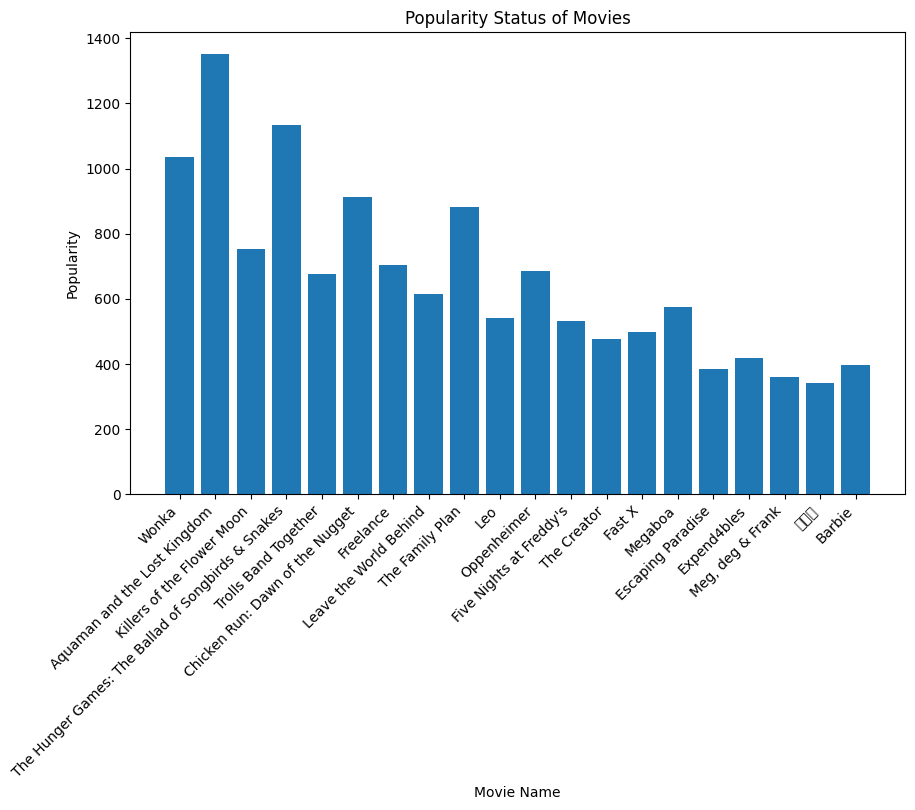

In [10]:
# filmlerin popülerliğini gösteren çubuk grafiği 
plt.figure(figsize=(10, 6))
plt.bar(df['original_title'], df['popularity'])
plt.xlabel('Movie Name')
plt.ylabel('Popularity')
plt.title('Popularity Status of Movies')
plt.xticks(rotation=45, ha='right')
plt.show()
